<center>
<img src="logo.png" height="900"> 
</center>


#  Простые симуляции

В этом задании мы решим несколько простых задачек на симуляции. 

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

__Под чёрточками имеется в виду условная вероятность!!!__

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`. 

In [44]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
obj = 10**6
poisson = sts.poisson(mu=2)
samples = poisson.rvs(size = obj)


ans1 = sum(samples>6) / len(samples)
ans2 = sum(samples[samples > 5] > 6) / sum(samples > 5)

ans3 = sum((samples > 5) & (samples < 7)) / len(samples)
ans4 = np.mean(samples**3)
ans5 = np.mean(samples[samples > 5])

# your code here


In [45]:
# проверка, что задание решено корректно
assert np.abs(ans3 - 0.01) < 1e-2

# Похожие тесты скрыты от вас

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. При симуляциях для генерации момента подения используйте для обоих серверов одну и ту же случайную величину. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [67]:
obj = 10**7


expon_rv = sts.expon(scale=10/3)
uniform_rv = sts.uniform(1, 2)

exp_sample = expon_rv.rvs(size=obj)
unif_sample = uniform_rv.rvs(size=[obj, 2])

one_success = ((unif_sample[:, 0] < 1.5) & (unif_sample[:, 1] >= 1.5)) | ((unif_sample[:, 0] >= 1.5) & (unif_sample[:, 1] < 1.5)) 
ans6 = np.mean(one_success & (exp_sample <= 1.5))

In [68]:
# проверка, что задание решено корректно
assert ans6 < 0.2
assert ans6 > 0.1

# Похожие тесты скрыты от вас

## Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. Запишите его в переменную `ans7`. В качестве параметров возьмите $\alpha=2, \theta = 10$.

In [87]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

obj = 10**6
unif_sample = sts.uniform.rvs(0, 1, size=obj)

theta = 10
alpha = 2

F_minus = lambda x, a, theta: theta ** (x ** (1/a))

new_sample = F_minus(unif_sample, alpha, theta)

ans7 = np.mean(new_sample)
# your code here

Нарисуйте для получившегося распределения гистограмму. Найдите в аналитическом виде плотность распределения. Нанесите её на картинку с гистограммой. 

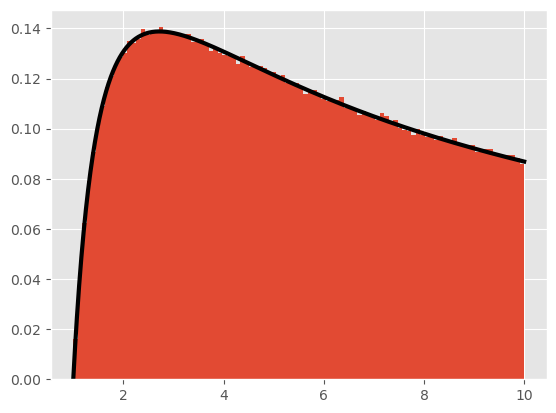

In [97]:
f_minus = lambda x, a, theta: (a / np.log(theta) ** a) * (np.log(x) ** (a - 1)) / x
x = np.linspace(1, theta, 1000)

pdf = f_minus(x, alpha, theta)

plt.hist(new_sample, density=True, bins=100)
plt.plot(x, pdf, linewidth=3, color='black')

In [72]:
# проверка, что задание решено корректно
assert ans7 < 6
assert ans7 > 2

# Похожие тесты скрыты от вас

## Упражнение 4 (сходимость по вероятности)

__Это задание никак не оценивается.__ У распределения хи-квадрат есть следующее свойство: если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по веротяности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ в лекции. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

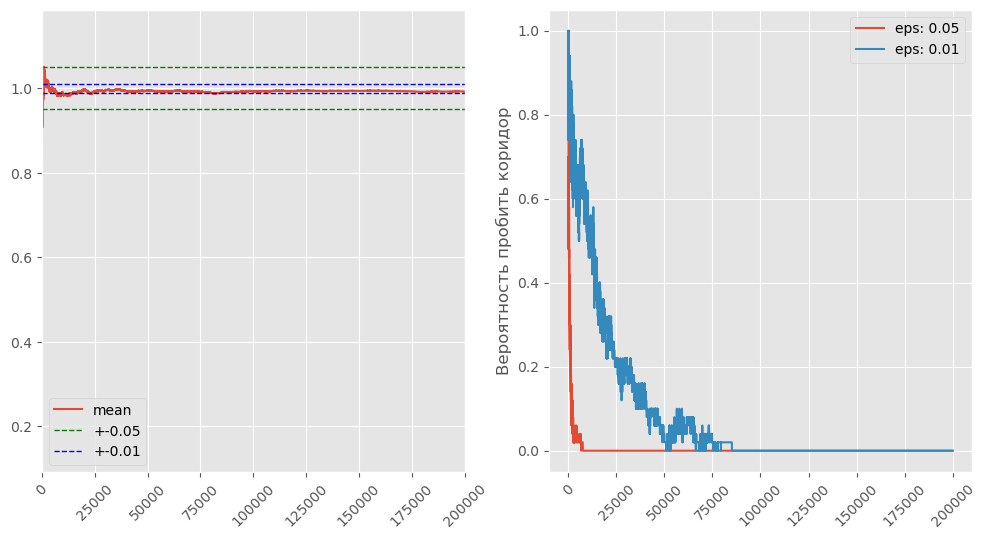

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
n_obj = 10 ** 5 * 2
norm = np.random.normal(size=(n_obj, 50)) ** 2
norm_mean = np.cumsum(norm, axis=0) / np.arange(1, n_obj + 1)[:, None]

u = 1

eps_0 = 0.05
eps_1 = 0.01

cond_0 = np.mean(np.abs(norm_mean - u) > eps_0, axis = 1)
cond_1 = np.mean(np.abs(norm_mean - u) > eps_1, axis = 1)


plt.figure(figsize=(12, 6))
ax_0 = plt.subplot(1, 2, 1)
plt.xlim(left=0, right=n_obj)
plt.plot(np.arange(1, n_obj + 1), norm_mean[:, 0], label = f'mean')
plt.axhline(u+eps_0, color='g', linestyle='dashed', linewidth=1)
plt.axhline(u-eps_0, color='g', linestyle='dashed', linewidth=1, label=f'+-{eps_0}')
ax_0.tick_params(axis='x', labelrotation = 45)

plt.axhline(u+eps_1, color='b', linestyle='dashed', linewidth=1)
plt.axhline(u-eps_1, color='b', linestyle='dashed', linewidth=1, label=f'+-{eps_1}')
plt.legend()

ax_1 = plt.subplot(1, 2, 2)
plt.plot(np.arange(1, n_obj + 1), cond_0, label = f'eps: {eps_0}')
plt.plot(np.arange(1, n_obj + 1), cond_1, label = f'eps: {eps_1}')
ax_1.tick_params(axis='x', labelrotation = 45)

plt.ylabel('Вероятность пробить коридор');
plt.legend()

In [6]:
ax_1

In [115]:
np.mean(np.abs(norm_mean - u) < eps_0, axis=1)

array([0.491, 0.516, 0.508, ..., 0.527, 0.527, 0.532], shape=(10000,))

In [112]:
norm_mean

array([[-7.36428131e-01,  8.72940207e-01, -9.48294662e-01, ...,
         2.07256484e-01, -3.15578555e-01,  7.26805185e-01],
       [-1.09124509e+00,  5.07757801e-01, -8.85836123e-01, ...,
         1.99331250e-01,  2.38123089e-01,  5.56003627e-01],
       [-5.44099065e-01,  5.00322473e-01, -2.99139868e-01, ...,
        -5.02818975e-01, -4.17744792e-02,  6.59394961e-01],
       ...,
       [ 1.68837702e-04,  1.69226979e-02, -1.52399276e-03, ...,
         6.56480101e-03, -1.15697092e-02,  1.42004427e-02],
       [ 1.81299061e-04,  1.69765606e-02, -1.44136066e-03, ...,
         6.46911456e-03, -1.18174773e-02,  1.42544499e-02],
       [ 1.12721663e-04,  1.70032781e-02, -1.50239180e-03, ...,
         6.51886214e-03, -1.19148551e-02,  1.41952278e-02]],
      shape=(10000, 1000))

In [ ]:
np.arange(1, n_obj + 1)[:, None]


array([[    1],
       [    2],
       [    3],
       ...,
       [ 9998],
       [ 9999],
       [10000]], shape=(10000, 1))